In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gdp
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from matplotlib.legend import Legend
import Data
import Search
import plotly.express as px

In [2]:
lis = Data.clean_lis()
cal = Data.clean_cal_price()

# Initialisation de la map de Seattle

In [3]:
map = gpd.read_file("./données/city-limits.geojson")

<AxesSubplot:>

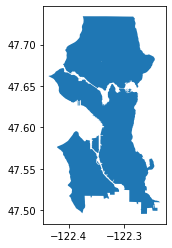

In [4]:
map.plot()

# Représentation géographiques des locations

Représetation de toutes les locations

In [5]:
geometry_all = [Point(xy) for xy in zip(lis["longitude"], lis["latitude"])]
points = GeoDataFrame(lis, geometry=geometry_all)   

<AxesSubplot:>

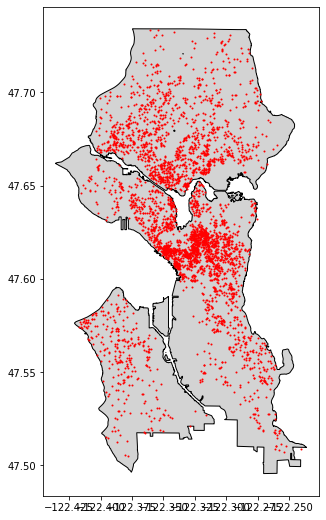

In [6]:
fig, ax = plt.subplots(figsize=(5,9))
points.plot(ax = ax,color='red',marker = 'o', markersize=1, zorder=2,)
map.plot(ax= ax,color='lightgrey', edgecolor='black', zorder=1)

Représentation des locations type Appartement

In [7]:
#On commence par récupérer seulements les coordonnées des locations de type apparetement
lat_a = lis[lis["property_type"] == "Apartment"]["latitude"]
lon_a = lis[lis["property_type"] == "Apartment"]["longitude"]
#On crée une nouvelle donnée geometry afin de pouvoir créer tous les points géographiques de chaque appartement
geometry_a = [Point(xy) for xy in zip(lon_a, lat_a)]
points_a = GeoDataFrame(lon_a, geometry=geometry_a)

<AxesSubplot:>

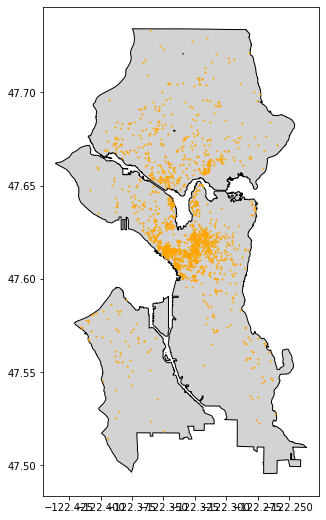

In [8]:
fig, ax = plt.subplots(figsize=(5,9))
points_a.plot(ax=ax, color='orange',marker = 'o', markersize=1, zorder=2)
map.plot(ax=ax, color='lightgrey', edgecolor='black', zorder=1)

Représentation des localisations selon le type de propriété

Text(0.5, 1.0, 'Localisation of House in location')

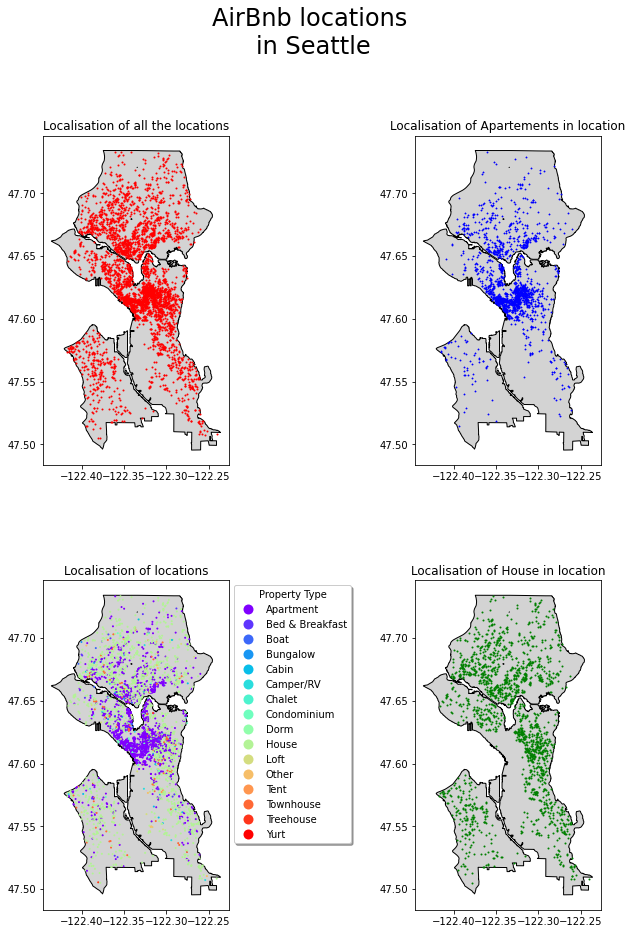

In [9]:
#Création d'un graphique à 4 sous-graphiques
#Initialisation de la taille du graphique et de la grille
fig, ax = plt.subplots(figsize=(10,15),nrows=2,ncols=2)
fig.suptitle('AirBnb locations \nin Seattle',size=24)
plt.subplots_adjust(wspace= 1) #On espace les graphiques afin de pouvoir insérer la légende

#On définit les 4 emplacements des sous-graphiques
ax1 = ax[0,0]
ax2 = ax[1,0]
ax3 = ax[0,1]
ax4 = ax[1,1]

#On représente l'ensemble des locations sur une carte de Seattle 
points.plot(ax = ax1, color='red',marker = 'o', markersize=1, zorder=2,)
map.plot(ax=ax1, color='lightgrey', edgecolor='black', zorder=1)
ax1.set_title("Localisation of all the locations")

#On représente l'ensemble des locations sur une carte de Seattle mais avec des couleurs différentes selon le type de location (appartement, maison, ...)
points.plot(ax=ax2,cmap='rainbow',marker = 'o', markersize=1, zorder=2, column=(lis["property_type"]),legend=True, 
legend_kwds={'title':'Property Type', 'bbox_to_anchor': (1,1), 'fancybox':True, 'shadow':True})
map.plot(ax=ax2, color='lightgrey', edgecolor='black', zorder=1)
ax2.set_title("Localisation of locations")

#On représente seulements les appartements en location à Seattle 
#On récupère les données de la partie précédente
points_a.plot(ax=ax3, color='blue',marker = '*', markersize=1, zorder=2)
map.plot(ax=ax3, color='lightgrey', edgecolor='black', zorder=1)
ax3.set_title("Localisation of Apartements in location")


#On représente seulements les maisons en location à Seattle 
lat_h = lis[lis["property_type"] == "House"]["latitude"]
lon_h = lis[lis["property_type"] == "House"]["longitude"]
geometry_h = [Point(xy) for xy in zip(lon_h, lat_h)]
points_h = GeoDataFrame(lon_h, geometry=geometry_h)
points_h.plot(ax=ax4, color='green',marker = 'o', markersize=1, zorder=2,)
map.plot(ax=ax4, color='lightgrey', edgecolor='black', zorder=1)
ax4.set_title("Localisation of House in location")

# Plotly : Carte intéractive

In [10]:
lismed=lis.median(numeric_only=True)

## Représentation de l'ensemble des locations par type de propriété

In [11]:
fig = px.scatter_mapbox(lis, lat="latitude",lon="longitude" ,hover_name="id",color="property_type", color_continuous_scale = "hot",
                           mapbox_style="carto-positron",
                           zoom=10, center = {"lat": lismed["latitude"], "lon": lismed["longitude"]},
                           opacity= 1)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Représentation des locations proposées par le moteur de recherche

In [12]:
results = Search.rech_all(lis, cal, 0, 150, ["Apartment","House"],["Queen Anne","Ballard"],'2016-04-06','2016-04-08',["TV"],20)

In [13]:
fig = px.scatter_mapbox(results, lat="latitude",lon="longitude" ,hover_name="name",color="price_y", color_continuous_scale = "OrRd",
                           mapbox_style="carto-positron", 
                           zoom=10, center = {"lat": lismed["latitude"], "lon": lismed["longitude"]},
                           opacity= 1)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
fig.write_html("./données/file.html")